<a href="https://colab.research.google.com/github/2303A51893/AIML/blob/main/2303A51893_Lab_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

data = load_iris()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with k=3:", accuracy)

Accuracy with k=3: 1.0


<ipython-input-2-35ce0f23be0a>:19: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', marker='x', label='Test')


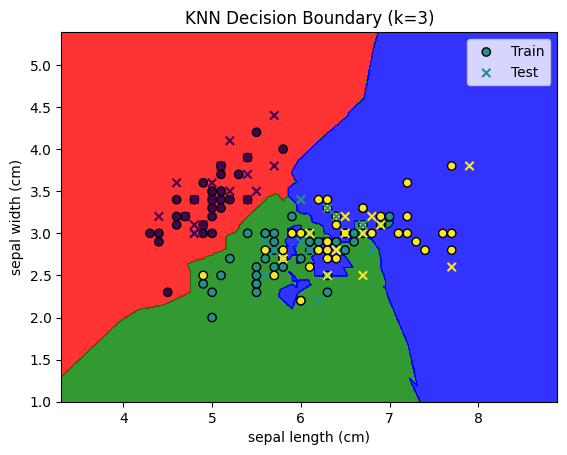

In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

X = data.data[:, :2]
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(('red', 'green', 'blue')))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', marker='o', label='Train')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', marker='x', label='Test')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title('KNN Decision Boundary (k=3)')
plt.legend()
plt.show()

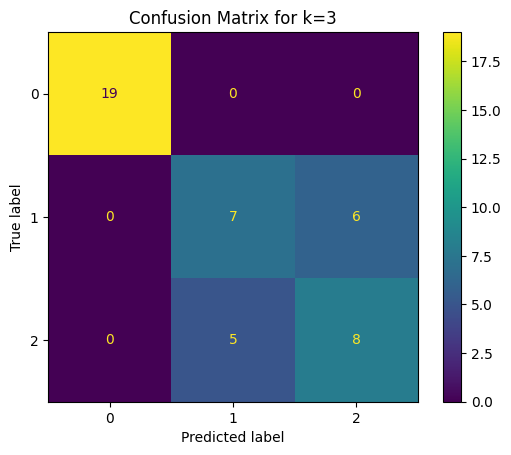

In [3]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix for k=3')
plt.show()

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_no_scaling = KNeighborsClassifier(n_neighbors=3)
knn_no_scaling.fit(X_train, y_train)
accuracy_no_scaling = accuracy_score(y_test, knn_no_scaling.predict(X_test))

knn_with_scaling = KNeighborsClassifier(n_neighbors=3)
knn_with_scaling.fit(X_train_scaled, y_train)
accuracy_with_scaling = accuracy_score(y_test, knn_with_scaling.predict(X_test_scaled))

print("Accuracy without scaling:", accuracy_no_scaling)
print("Accuracy with scaling:", accuracy_with_scaling)

Accuracy without scaling: 0.7555555555555555
Accuracy with scaling: 0.8


In [5]:
knn_k5 = KNeighborsClassifier(n_neighbors=5)
knn_k5.fit(X_train, y_train)
y_pred_k5 = knn_k5.predict(X_test)
accuracy_k5 = accuracy_score(y_test, y_pred_k5)

print("Accuracy with k=5:", accuracy_k5)

Accuracy with k=5: 0.7777777777777778
